# Space Server Dataset

#### This dataset consists of 10,000 records of observations of space taken by the Sloan Digital Sky Survey. Every observation is described by 17 feature columns and 1 target column which identifies the observation to be a star, a galaxy or a quasar.

#### Feature description

objid = Object Identifier

ra = J2000 Right Ascension (r-band)

dec = J2000 Declination (r-band)

u, g, r, i, z are the Thuan-Gunn astronomic magnitude system which represents the response of the 5 bands of the telescope.
    
run = Run Number,which identifies the specific scan

rereun = Rerun Number,specifies how the image was processed.

camcol = Camera column,a number from 1 to 6, identifying the scanline within the run

field = Field number,The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs

specobjid = Object Identifier

class = object class (galaxy, star or quasar object)

redshift = Final Redshift

plate = plate number

mjd = MJD of observation,used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

fiberid = fiber ID

In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the csv file
df=pd.read_csv("space server.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
#checking the dimensions of our dataset
df.shape

(10000, 18)

the data set has 10,000 rows and 18 columns.The target column is "class" and rest of the 17 columns indicate features

In [4]:
#checking the columns in dataset
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

There are 18 columns in the dataset

In [5]:
#checking the data type of all columns
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

Only the "class" is object type rest of the data ie either int or float

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [7]:
#checking for null entries
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Our dataset does not contain any null values 

In [8]:
#checking the unique entries in each column
df.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

Thus "objid" and "rerun" are similar for all entries

"camcol" ranges from 1 to 6

"class" has 3 unique valuesi.e star,galaxy,quasar object

# Visualizations

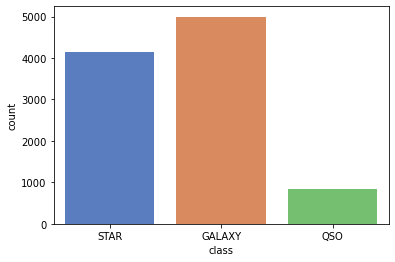

In [9]:
#countplot of categories in class
sns.countplot(df["class"], palette="muted")
plt.show()

There are 4998 Galaxies

4152 stars

850 QSO

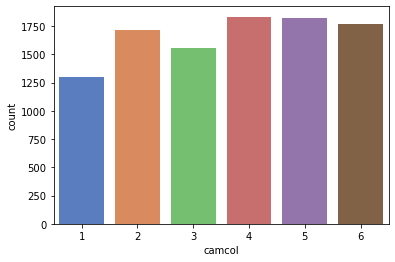

In [10]:
#categories in camcol
sns.countplot(df["camcol"],palette="muted")
plt.show()

There are 6 different values for camcol which are are follows:
    
1---->1298

2---->1712

3---->1560

4---->1834

5---->1827

6----->1769


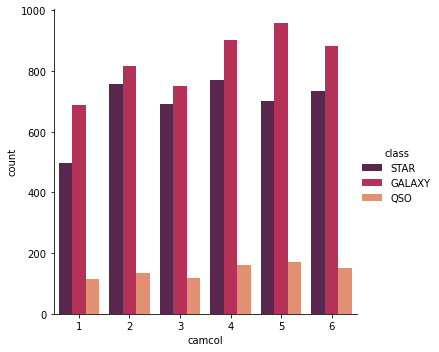

In [11]:
sns.catplot(x="camcol", kind="count",hue="class",palette='rocket', data=df)
plt.show()

#### observations

Each camcol has huge number of galaxies ,moderate range of stars and qso are least in each camcol

Thus camcol 5 has the maximum number of galaxies

QSo are highest in camcol 5

camcol 2 has highest number of stars

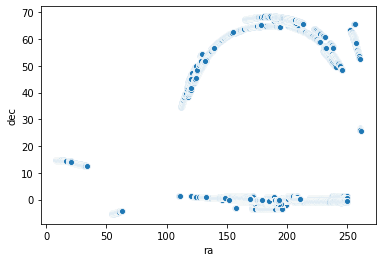

In [12]:
sns.scatterplot(x='ra',y='dec',data=df)
plt.show()

we can see a non linear relationship between "ra" and "dec"

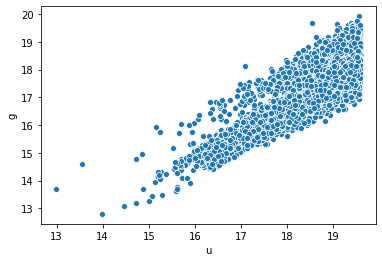

In [13]:
sns.scatterplot(x='u',y='g',data=df)
plt.show()

u and g shows a linear relationship and is dense for u=18 to 20 and g=16.5 to 20

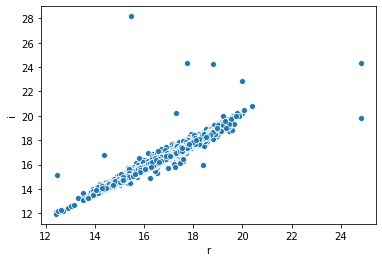

In [14]:
sns.scatterplot(x='r',y='i',data=df)
plt.show()

with an increase in "r" there is in "i"

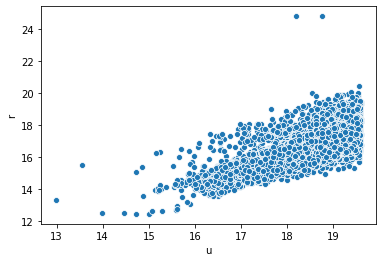

In [15]:
sns.scatterplot(x='u',y='r',data=df)
plt.show()

Data is dense between u = 17 to 20 and r=15 to 20

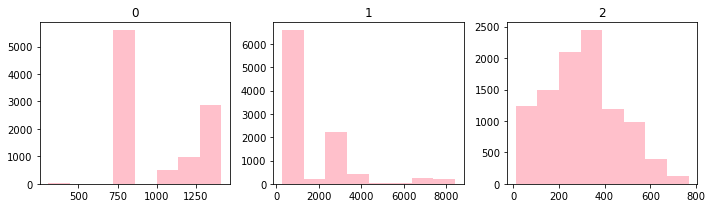

In [16]:
#plotting histogram for numerical data
hist_list=["run","plate","field"]
ncol=3
nrow=1
plt.figure(figsize=(10,3))

for i in range(0,len(hist_list)):
    plt.subplot(nrow,ncol,i+1)
    plt.title(i)
    plt.hist(df[hist_list[i]],bins=8,color='pink')
    plt.tight_layout()


#### Obesrvations

1)Run Plot:maximum runs are 756 which are recorded for 3060 entries 
    
2)Plate:There are 2558 records with 222 plate values
    
3)maximum field value is 301

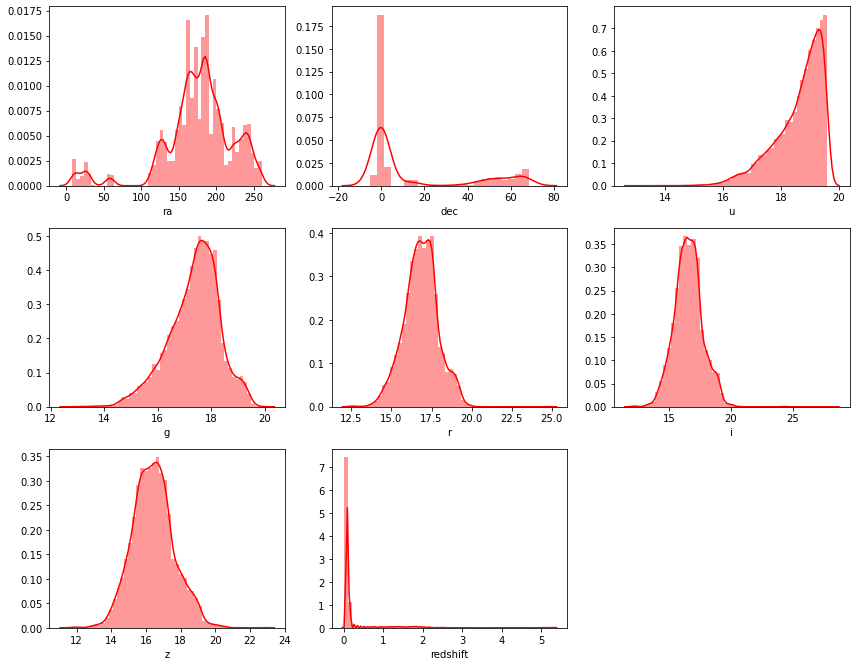

In [17]:
#distribution plot for features
cols=['ra', 'dec', 'u', 'g', 'r', 'i', 'z','redshift']
nrow=4
ncol=3
plt.figure(figsize=(12,12))
for i in cols:
    plt.subplot(nrow,ncol,cols.index(i)+1)
    sns.distplot(df[i],color='r')
    plt.tight_layout()
plt.show()

#### observations

Thus columns with right skew are: "dec" , "redshift"
    
"ra" ,"u" ,"g", "r", have left skew

"i" and "z" have normal distributions

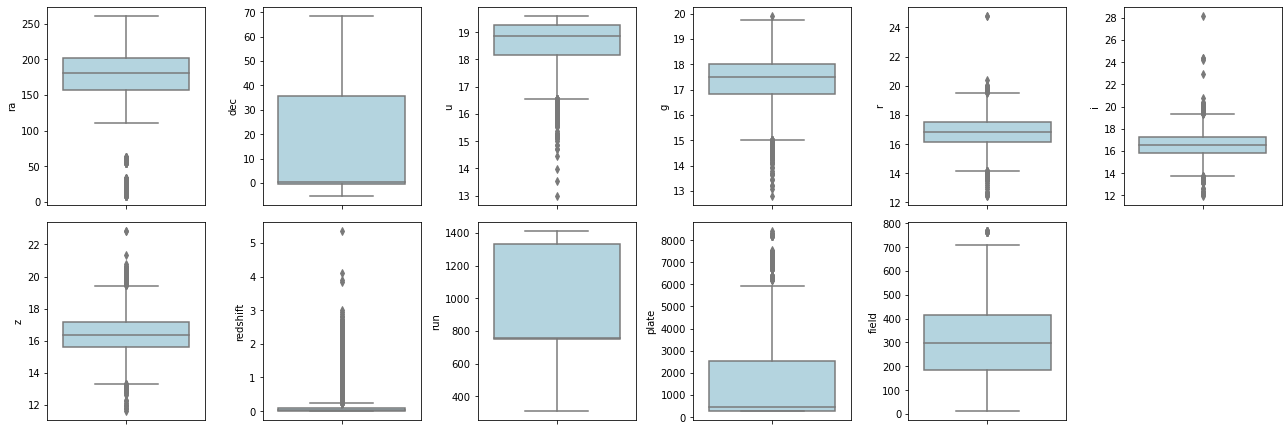

In [18]:
#Boxplot for outlier detection

cols=['ra', 'dec', 'u', 'g', 'r', 'i', 'z','redshift',"run","plate","field"]
ncol=6
nrow=6
plt.figure(figsize=(3*ncol,3*ncol))
for i in range(0,len(cols)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[cols[i]],orient='v',color='lightblue')
    plt.tight_layout()

#### observations

There are only 2 Columns with no outliers : "dec" and "run"

"redshift" has the maximum outliers

# Statistical Analysis

As our target is object type so we should map it to numeric data

In [19]:
#check the distribution of each class
df["class"].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [20]:
#mapping the class values
#label encoder can also be used

df["class"]=df["class"].map({"GALAXY":0,"STAR":1,"QSO":2})
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,1,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,1,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,1,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,1,0.000590,3306,54922,512


In [21]:
#checking the data type of our target after mapping
df["class"].dtypes

dtype('int64')

Thus we can see that the class values are replaced with 0,1 and 2 also the datatype has been changed from object to int64

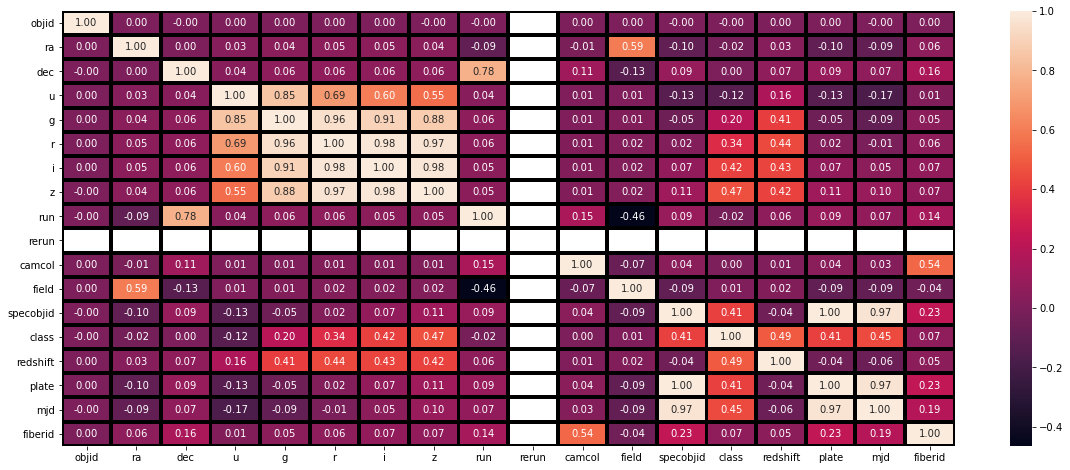

In [22]:
#plotting the heatmap for correlation
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=3,linecolor="black")
plt.show()

#### observations

***columns with strong positive correlation with target : 

1)"redshift"=(0.49) ,

2)"z"=(0.47) ,

3)"mjd"=0.45, 

4)"i"=0.42
    
"plate" has correlation of 0.41

***columns with least correlation with target are :

1)ra

2)run

***columns with zero correlation with target:

1)objid

2)dec

3)camcol



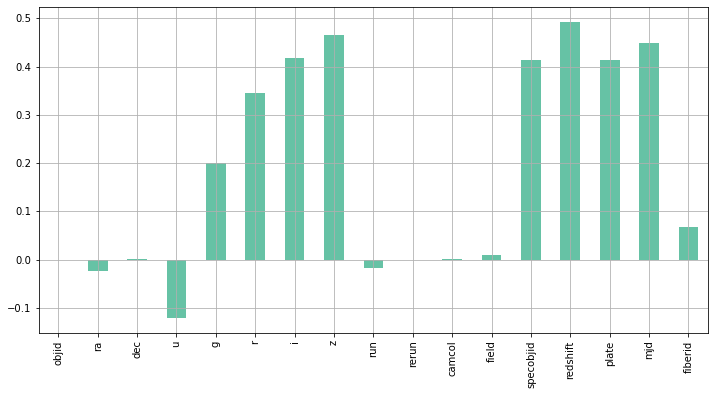

In [23]:
#viewing the correlation using bar graph
plt.figure(figsize=(12,6))
df.drop("class",axis=1).corrwith(df["class"]).plot(kind="bar",grid=True,cmap="Set2")
plt.show()

In [24]:
#finding the mean,median and other statistical summary
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.585200,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.642481,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,1.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


#### Observations:

columns with high standard deviation:
    
1)ra , 2) dec, 3) run , 4) field, 5)plate , 6)mjd , 7) fiberid


1)RA

min=8.235100

max=260.884382

mean=175.529987

std_dev=47.783439


2)dec

min=5.382632

max=68.542265

mean=14.836148	

std_dev=25.212207

3)u

min=12.988970	

max=19.599900

mean=14.836148	

std_dev=0.828656

4)g

min=12.799550		

max=19.918970

mean=17.371931	

std_dev=0.945457

4)r

min=12.431600		

max=24.802040

mean=16.840963	

std_dev=1.067764

And similarly we can observe the values for other attributes as well

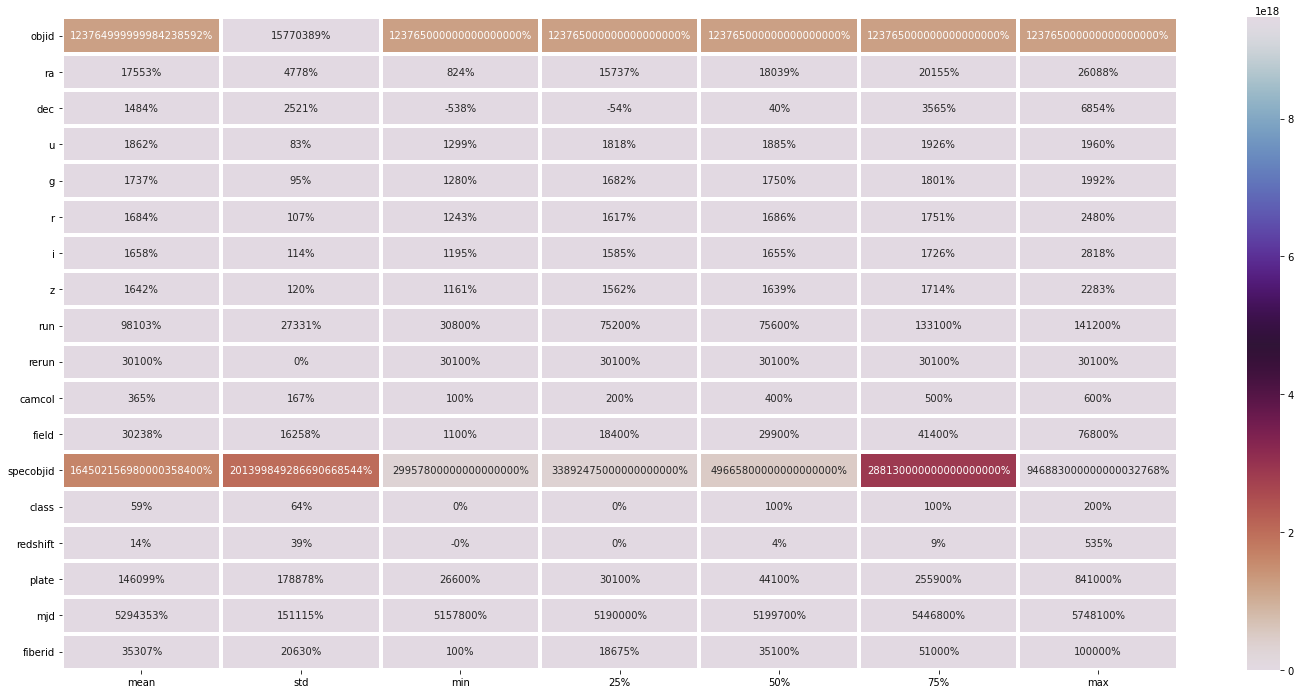

In [25]:
#plotting df.describe for better reading
plt.figure(figsize=(25,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='.0%',linecolor='w',linewidth=3,cmap='twilight_r')
plt.show()

Thus we can see the blocks with darker shades are representing higher values

In [26]:
#Dropping certain columns
#objid,specobjid,fiberid will not have any effect on the target variable so we can drop them
#also rerun has only 1 value and has no relation with target so we can drop them too

df.drop(["objid","specobjid","fiberid","rerun"],axis=1,inplace=True)
df.sample()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd
9435,184.160703,-0.519152,19.44092,18.35797,17.9057,17.71344,17.64874,756,2,456,1,-0.000135,324,51666


In [27]:
#checking skewness
df.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
class       0.641904
redshift    4.265729
plate       1.794609
mjd         1.039610
dtype: float64

redshift has the maximun skewness 

while "i" , "z",  and "field" shows approximately normal distribution and has no skew or very less skew

#### Outlier Detection using z-scores

In [28]:
#outlier detection using zscores
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.16745842, 0.58492272, 1.03148637, ..., 0.36973112, 1.03148936,
        1.30931064],
       [0.16886159, 0.58311429, 0.05243046, ..., 0.36984929, 0.63621258,
        0.87919741],
       [0.17057433, 0.58347525, 0.92156796, ..., 0.05302706, 0.65633905,
        0.60919097],
       ...,
       [0.92039468, 1.46090664, 0.16753826, ..., 0.37074104, 3.26608697,
        2.69309363],
       [0.92197294, 1.46432109, 0.31801835, ..., 0.33364691, 0.56688806,
        0.70581092],
       [0.91804124, 1.46639319, 0.79229193, ..., 0.06510125, 0.56688806,
        0.70581092]])

In [29]:
#printing values greater than 3
print(np.where(z>3)) 

(array([  45,  109,  129, ..., 9992, 9994, 9997], dtype=int64), array([11, 11, 11, ..., 12, 12, 12], dtype=int64))


In [30]:
df_new=df[(z<3).all(axis=1)]
print("original shape=",df.shape)
print("new shape=",df_new.shape)

original shape= (10000, 14)
new shape= (8713, 14)


In [31]:
#percentage loss due to outliers
print("percentage loss=",((10000-8713)/10000)*100)

percentage loss= 12.870000000000001


#### Observations

we should not skip the outliers as most of the features has outliers which may convey important information

Therefore we should use the original dataset


# Data split

In [32]:
#assinging all features to x variable
x=df.drop(["class"],axis=1)
x.sample()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd
5161,162.413329,1.053765,18.53016,16.82702,16.16866,15.93341,15.82378,756,6,311,0.00024,2559,54208


In [33]:
#checking the skewness
x.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
redshift    4.265729
plate       1.794609
mjd         1.039610
dtype: float64

We can see skewness in most of the columns so we should treat them

redshift has the maximum skewness among all

In [34]:
#treating the skewness using squareroot method


for col in x.skew().index:
    if col in df.describe().columns:
        if x[col].skew()>0.55:
            x[col]=np.sqrt(x[col])
        if x[col].skew()<-0.55:
            x[col]=np.cbrt(x[col])

In [35]:
#check if the skew is reduced
x.skew()

ra         -2.773755
dec         0.298224
u          -1.315798
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
redshift    2.268173
plate       1.093870
mjd         1.025184
dtype: float64

In [36]:
#assigning the class/target to y variable
y=df["class"]

# Scailing

In [37]:
#scailing the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [38]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.229925,-1.030614,1.011068,-0.348559,-0.837280,-0.946058,-0.995342,-0.838061,0.210852,-0.217630,NaN,1.242669,1.313699
1,0.230907,-1.009859,0.066388,-0.166533,-0.154155,-0.082645,-0.026043,-0.838061,0.210852,-0.217630,NaN,-0.722369,-0.884050
2,0.232104,-1.013682,0.906332,0.867093,0.593154,0.441201,0.314528,-0.838061,0.210852,-0.211479,0.215421,-0.773632,-0.609170
3,0.234888,-1.053725,-1.011105,-0.813627,-0.636692,-0.526604,-0.430921,-0.838061,0.210852,-0.205328,NaN,1.242669,1.313699
4,0.235074,-1.024308,-1.274740,-1.172519,-0.376762,-0.025101,0.158276,-0.838061,0.210852,-0.205328,-0.830571,1.242669,1.313699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.621106,1.059246,0.248930,0.104292,0.069416,0.087121,0.068876,1.331785,-0.389352,-0.869659,-0.376449,-0.564762,-0.707409
9996,-0.621295,1.062033,-0.397816,0.070402,0.220993,0.116515,0.229516,1.331785,-0.389352,-0.863508,0.190783,-0.564762,-0.707409
9997,-0.616788,1.061941,0.178857,0.429347,0.634775,0.743983,0.829211,1.331785,-0.389352,-0.863508,NaN,2.632703,2.669300
9998,-0.618166,1.063759,0.325314,0.569857,0.646764,0.682516,0.595986,1.331785,-0.389352,-0.857356,-0.529163,-0.564762,-0.707409


In [39]:
x.isnull().sum()

0        0
1     3774
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10    1919
11       0
12       0
dtype: int64

Due to standard scailing we have certain NaN values in our dataset which should be replaced with the mean values in order to split the train test data

#### Handling Null Values

In [40]:
x[1]=x[1].fillna(x[1].mean())

In [41]:
x[1].isnull().sum()

0

In [42]:
x[10]=x[10].fillna(x[10].mean())

In [43]:
x[10].isnull().sum()

0

#### Finding the best random state using a for loop

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

best_rstate=0
accu=0

for i in range(0,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    kn=KNeighborsClassifier()
    kn.fit(x_train,y_train)
    y_pred=kn.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
   
    
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
       
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate)) 
print("cross validation score is ",cross_val_score(kn,x,y,cv=5).mean()*100)
        
        
            
    

Best accuracy is  100.0 found on random state 11
cross validation score is  91.03


In [45]:
#using the best random state found to split the data for test and train 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=11)

#### Finding the best model 

In [46]:
#importing libraries required for modelling

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#boosting models

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier


#evaluation metrics
from sklearn.metrics import confusion_matrix,classification_report


# Using for loop to evaluate performance of each model

In [47]:

models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),
       BaggingClassifier(),ExtraTreesClassifier()]
for i in models:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    y_pred=i.predict(x_test)
    print("accuracy score of ",i,"=",accuracy_score(y_test,y_pred)*100)
    print("cross validation score =",cross_val_score(i,x,y,cv=5).mean()*100)
    print(("difference=",(accuracy_score(y_test,y_pred)*100)-(cross_val_score(i,x,y,cv=5).mean()*100)))
    print("\n")


accuracy score of  LogisticRegression() = 95.03333333333333
cross validation score = 94.48
('difference=', 0.5533333333333275)


accuracy score of  DecisionTreeClassifier() = 98.63333333333333
cross validation score = 98.02
('difference=', 0.7033333333333331)


accuracy score of  KNeighborsClassifier() = 92.0
cross validation score = 91.03
('difference=', 0.9699999999999989)


accuracy score of  GaussianNB() = 89.16666666666667
cross validation score = 88.61000000000001
('difference=', 0.5566666666666578)


accuracy score of  SVC() = 94.5
cross validation score = 94.11
('difference=', 0.39000000000000057)


accuracy score of  RandomForestClassifier() = 98.56666666666666
cross validation score = 98.08
('difference=', 0.5066666666666464)


accuracy score of  AdaBoostClassifier() = 76.03333333333333
cross validation score = 85.16999999999999
('difference=', -9.136666666666656)


accuracy score of  GradientBoostingClassifier() = 99.16666666666667
cross validation score = 98.99000000000001


#### As we can see the differences between cross validation and accuracy score is less for SVC,Gradient Boosting,DecisionTree and randomForest we shall hypertune them and see for the best model after hypertunning

# SVC

In [48]:
#hypertuning for svc
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={"kernel":["linear","poly","rbf","sigmoid"],"gamma":["scale","auto"],"random_state":[10,20,33,42]}
                      
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'gamma': 'scale', 'kernel': 'linear', 'random_state': 10}


In [49]:
#using the best parameter for svc from the one's obtained above
svc=SVC(kernel='linear',random_state=10,gamma="scale")
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
svc_score=accuracy_score(y_test,y_pred)*100
print("accuracy",svc_score)
svc_crossval=cross_val_score(svc,x,y,cv=5).mean()*100
print("cross_validation score=",svc_crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 96.66666666666667
cross_validation score= 95.83999999999999


confusion matrix 
 [[1432   50    5]
 [  38 1214    0]
 [   7    0  254]]


classification report
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1487
           1       0.96      0.97      0.97      1252
           2       0.98      0.97      0.98       261

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



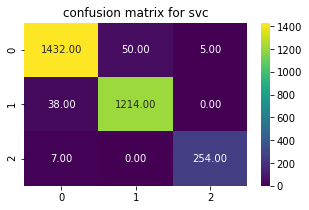

In [50]:
#confusion matrix for svc
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="viridis",fmt="0.2f")
plt.title("confusion matrix for svc")
plt.show()

#### observations

for class 0:1432 values are correctly predicted while 50 values are falsely predicted as class 1 and 5 as class 2

for class 1:1214 values are correctly predicted while there are 38 error which are predicted as class one
    
for class 2 : 254 values are correctly predicted while 7 are wrongly predicted as class 0

# RandomForest Classifier

In [51]:
#hypertunning RandomForest Classifier

rfc=RandomForestClassifier()

parameters={"n_estimators":[50,60,70,80,90],"criterion":['gini','entropy'],"max_features":["auto","sqrt","log2"]}
abc=GridSearchCV(rfc,parameters)
abc.fit(x_train,y_train)
print(abc.best_params_)
                                

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 90}


In [52]:
#using the best parameter obtained above
rfc=RandomForestClassifier(criterion='entropy',max_features="sqrt",n_estimators=90)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
rfc_score=accuracy_score(y_test,y_pred)*100
print("accuracy",rfc_score)
rfc_crossval=cross_val_score(rfc,x,y,cv=5).mean()*100
print("cross_validation score=",rfc_crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 98.93333333333332
cross_validation score= 98.14


confusion matrix 
 [[1469   12    6]
 [   2 1250    0]
 [  12    0  249]]


classification report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1487
           1       0.99      1.00      0.99      1252
           2       0.98      0.95      0.97       261

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



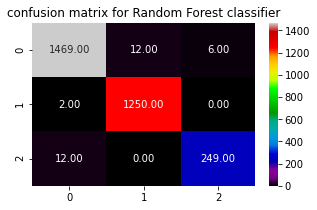

In [53]:
#confusion matrix for Random Forest classifier
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='nipy_spectral',fmt="0.2f")
plt.title("confusion matrix for Random Forest classifier")
plt.show()

#### observations

for class 0 ---> 12 values are predicted wrongly as class 1 and 6 values are predicted wrongly as class 2.1469 are predicted correctly

for class 1 ---> 2 values are predicted wrongly as class 0  and 1250 values are predicted accurately

for class 2---> 12 values are predicted wrongly as class 0 and 249 values are predicted accurately

# Gradient Boosting Regression

In [54]:
#using the best parameter obtained above
gb=GradientBoostingClassifier(learning_rate=0.2,n_estimators=200,criterion='mse')
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
gb_score=accuracy_score(y_test,y_pred)*100
print("accuracy",gb_score)
gb_crossval=cross_val_score(gb,x,y,cv=5).mean()*100
print("cross_validation score=",gb_crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 99.1
cross_validation score= 98.98


confusion matrix 
 [[1476    2    9]
 [   4 1248    0]
 [  12    0  249]]


classification report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1487
           1       1.00      1.00      1.00      1252
           2       0.97      0.95      0.96       261

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



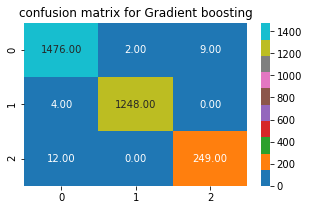

In [55]:
#confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='tab10',fmt="0.2f")
plt.title("confusion matrix for Gradient boosting")
plt.show()

#### observations

for class 0:1476 values are correctly predicted while 2 values are falsely predicted as class 1 and 9 as class 2

for class 1:1248 values are correctly predicted while there are 4 error which are predicted as class 0
    
for class 2 : 249 values are correctly predicted while 12 are wrongly predicted as class 0

# Decision Tree

In [56]:
#hypertunning Decision Tree Classifier

dtc=DecisionTreeClassifier()
parameters={"splitter":["best","random"],"criterion":["gini","entropy"],
            "max_features":['auto','sqrt','log2']}
pqr=GridSearchCV(dtc,parameters)
pqr.fit(x_train,y_train)
print(pqr.best_params_)
                                

{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}


In [57]:
#using the best parameter obtained above
dtc=DecisionTreeClassifier(criterion='gini', max_features= 'sqrt', splitter='best')
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
dtc_score=accuracy_score(y_test,y_pred)*100
print("accuracy",dtc_score)
dtc_crossval=cross_val_score(dtc,x,y,cv=5).mean()*100
print("cross_validation score=",dtc_crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 97.16666666666667
cross_validation score= 93.73000000000002


confusion matrix 
 [[1445   15   27]
 [  12 1236    4]
 [  25    2  234]]


classification report
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1487
           1       0.99      0.99      0.99      1252
           2       0.88      0.90      0.89       261

    accuracy                           0.97      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000



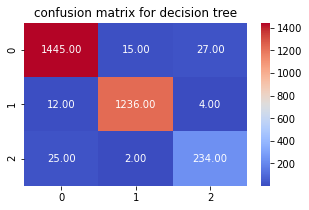

In [58]:
#confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm',fmt="0.2f")
plt.title("confusion matrix for decision tree")
plt.show()

#### observations

for class 0:1445 values are correctly predicted while 15 values are falsely predicted as class 1 and 27 as class 2

for class 1:1236 values are correctly predicted while there are 12 error which are predicted as class 0 and 4 values as class 2
    
for class 2 : 234 values are correctly predicted while 25 are wrongly predicted as class 0 and 2 are predicted as class 1

# KNN

In [59]:
#hypertunning KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={"n_neighbors":[2,3,4,5,6,7,8],"weights":['uniform','distance'],"algorithm":["auto","ball_tree","brute"],
           "leaf_size":[81,20,54,62,30,40]}
abc=GridSearchCV(knn,parameters)
abc.fit(x_train,y_train)
print(abc.best_params_)                               

{'algorithm': 'auto', 'leaf_size': 81, 'n_neighbors': 4, 'weights': 'distance'}


In [60]:
#using the best parameter obtained above
knn=KNeighborsClassifier(algorithm='auto',leaf_size=81,n_neighbors=4,weights='distance')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
knn_score=accuracy_score(y_test,y_pred)*100
print("accuracy",knn_score)
knn_crossval=cross_val_score(knn,x,y,cv=5).mean()*100
print("cross_validation score=",knn_crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 92.56666666666666
cross_validation score= 91.43


confusion matrix 
 [[1423   59    5]
 [ 123 1128    1]
 [  23   12  226]]


classification report
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1487
           1       0.94      0.90      0.92      1252
           2       0.97      0.87      0.92       261

    accuracy                           0.93      3000
   macro avg       0.94      0.91      0.92      3000
weighted avg       0.93      0.93      0.93      3000



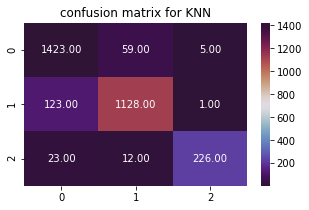

In [61]:
#confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='twilight_shifted',fmt="0.2f")
plt.title("confusion matrix for KNN")
plt.show()

#### observations

for class 0:1432 values are correctly predicted while 59 values are falsely predicted as class 1 and 5 as class 2

for class 1:1128 values are correctly predicted while there are 123 error which are predicted as class 1
    
for class 2 : 226 values are correctly predicted while 23 are wrongly predicted as class 0 and 12 as class 1

# Comparing various model performances

In [62]:
#creating a comparision table for better understanding

data=pd.DataFrame({
    "Model":['SVC',"RandomForest","GradientBoosting","Decision Tree","KNN"],
    "Accuracy Score":[svc_score,rfc_score,gb_score,dtc_score,knn_score],
    "Cross Validation score":[svc_crossval,rfc_crossval,gb_crossval,dtc_crossval,knn_crossval]})

data.sort_values(by="Accuracy Score",ascending=False)

,Model,Accuracy Score,Cross Validation score
2,GradientBoosting,99.100000,98.98
1,RandomForest,98.933333,98.14
3,Decision Tree,97.166667,93.73
0,SVC,96.666667,95.84
4,KNN,92.566667,91.43


# Saving the best model

In [63]:
#saving random forest as our best model
import pickle
filename="space-server.pkl"
pickle.dump(rfc,open(filename,'wb'))

In [64]:
actual=np.array(y_test)
predicted=np.array(rfc.predict(x_test))

In [65]:
df_com=pd.DataFrame({"actual values":actual,"predicted values":predicted})
df_com

,actual values,predicted values
0,0,0
1,2,2
2,1,1
3,1,1
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,1,1
2998,0,0


# CONCLUSION

Thus for the space server dataset i have performed classification on the target/class using various classification algorithms.

"Random Forest classifier" gave me the best possible accuracy which lead to correct predictions

The model has accuracy score of 98.73.

Various evaluation metrics such as accuracy score,cross valildation,classification report and confusion matrix are observed 